# Nonlinear Dimensionality Reduction - MDS & ISOMAP

## Classical Multi-Dimensional Scaling (MDS)

* MDS begins with a *proximity matrix*, $\mathbf{D}$. 
* A proxmity matrix is:

    - A *metric* if (1) $d_{ij} \ge 0$, (2) $d_{ii} = 0$, (3) $d_{ij} = d_{ji}$, (4) $d_{ij} \le d_{ik} + d_{jk}$
    - *Euclidean* if there exists a configuration of points in Euclidean space with the same $d_{ij}$ values. 




- **Goal:** Given an assumed Euclidean proximity matrix, $\mathbf{D}$, we want to find some set of points, $\mathbf{X}$, that has the same proximity matrix

- Let:
\begin{eqnarray}
\mathbf{B} = \mathbf{XX}^T = \mathbf{XM}(\mathbf{XM})^T \textbf{ if } \mathbf{M} \text{ is an orthogonal matrix}
\end{eqnarray}
Then, $b_{ij} = \sum_{k=1}^d x_{ik}x_{jk}$

- So, if we can find $\mathbf{B}$, then we can determine $\mathbf{X}$  by something like: $\mathbf{X} \approx \mathbf{B}^{-1/2}$ since $\mathbf{B} = \mathbf{XX}^T$


- The squared Euclidean distances between the rows of $\mathbf{X}$ can be written in terms of $\mathbf{B}$:
\begin{eqnarray}
d_{ij}^2 &=& \sum_{k=1}^d (x_{ik} - x_{jk})^2\\
d_{ij}^2 &=& \sum_{k=1}^d (x_{ik}^2 - 2x_{ij}x_{jk} + x_{jk}^2)\\
d_{ij}^2 &=& b_{ii} + b_{jj} - 2b_{ij}
\end{eqnarray}

- We need to introduce constraints since the promixity matrix does not provide enough information for a unique solution (e.g. you get the same proximity matrix after rotating or translating the data).
So, let's enforce: $\sum_{i=1}^n x_{ik} = 0 \quad \forall k$

- This implies:
\begin{eqnarray}
\sum_{j=1}^n b_{ij} &=& \sum_{j=1}^n \sum_{k=1}^d x_{ik}x_{jk} \\
&=&  \sum_{k=1}^d x_{ik} \left(\sum_{j=1}^n x_{jk}\right)\\
&=& 0
\end{eqnarray}

- Given the above, consider (where $T$ is the trace of matrix $\mathbf{B}$):
\begin{eqnarray}
\sum_{i=1}^n d_{ij}^2 &=& \sum_{i=1}^n \left(b_{ii} + b_{jj} - 2b_{ij}\right) =  \sum_{i=1}^n b_{ii} +  \sum_{i=1}^n b_{jj} -   \sum_{i=1}^n 2b_{ij}  = T + nb_{jj} \\
\sum_{j=1}^n d_{ij}^2 &=& \sum_{j=1}^n \left(b_{ii} + b_{jj} - 2b_{ij}\right) =  \sum_{j=1}^n b_{ii} +  \sum_{j=1}^n b_{jj} -   \sum_{j=1}^n 2b_{ij}  = T + nb_{ii} \\
\sum_{i=1}^n \sum_{j=1}^n d_{ij}^2 &=& \sum_{i=1}^n \sum_{j=1}^n \left(b_{ii} + b_{jj} - 2b_{ij}\right)  = 2nT 
\end{eqnarray}

- We can solve the system of equations and determine that $\mathbf{B}$ can be estimated from $\mathbf{D}$ as follows:
\begin{eqnarray}
b_{ij} = -\frac{1}{2}\left( d_{ij}^2 + \frac{1}{n}\sum_{j=1}^n d_{ij}^2 - \frac{1}{n}\sum_{i=1}^n d_{ij}^2  + \frac{1}{n^2}\sum_{i=1}^n\sum_{j=1}^n d_{ij}^2  \right)
\end{eqnarray}

- Then we can estimate $\mathbf{X}$ as follows:
\begin{eqnarray}
\mathbf{B} = \mathbf{V\Lambda V^T}\\
\mathbf{X} = \mathbf{V \Lambda}^{1/2}
\end{eqnarray}
keeping only the $d$ dimensions of interest corresponding to the largest eigenvalues.



 There are many variations on classical MDS.

## ISOMAP
- Also a manifold learning, graph-based approach
- Builds on classical MDS
- The ISOMAP algorithm:

    1. Identify the neighbors of each point on the manifold (e.g., $K$ nearest neighbors, $\epsilon$-ball approach).  The edges between neighbors are weighted using their distance in the input space. 
    2. Compute the distance between all pairs of points on the manifold by computing their shortest path distance on the graph created in step 1. (e.g. Dijkstra's algorithm)
    3. Apply classical MDS to the matrix of graph distances computed in step 2. 


- Floyd's algorithm to compute graph-based distance:

    1. Initialize $d_{G}(i,j) = d_{X}(i,j)$ if $i,j$ are identified as neighbors.  Otherwise, set $d_{G}(i,j) = \infty$
    2. For each value of $k=1,\ldots, N$ replace all entries of $d_{G}(i,j)$ by $\min(d_{G}(i,j), d_{G}(i,k) + d_{G}(k,j))$




D:\Anaconda\install\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


ISO: 0.2 sec
MDS: 1.7 sec


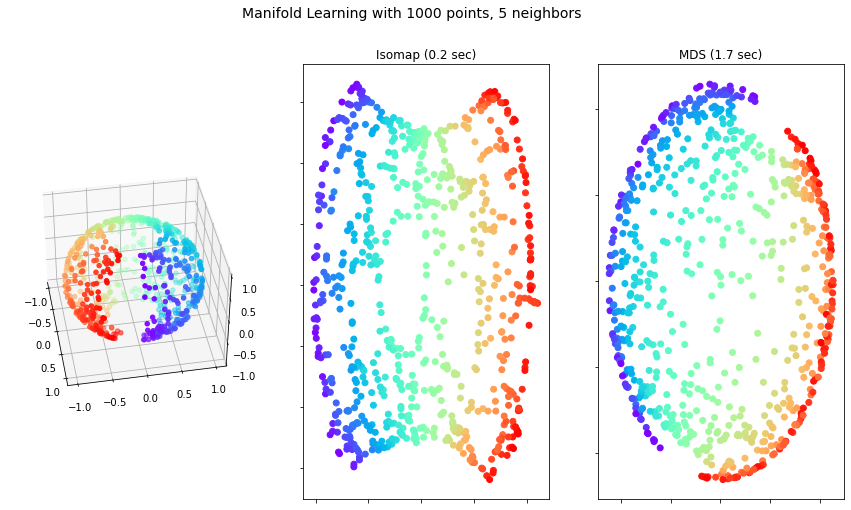

In [5]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

"""
=============================================
Manifold Learning methods on a severed sphere
=============================================

An application of the different :re
f:`manifold` techniques
on a spherical data-set. Here one can see the use of
dimensionality reduction in order to gain some intuition
regarding the manifold learning methods. Regarding the dataset,
the poles are cut from the sphere, as well as a thin slice down its
side. This enables the manifold learning techniques to
'spread it open' whilst projecting it onto two dimensions.

For a similar example, where the methods are applied to the
S-curve dataset, see :ref:`example_manifold_plot_compare_methods.py`

Note that the purpose of the :ref:`MDS <multidimensional_scaling>` is
to find a low-dimensional representation of the data (here 2D) in
which the distances respect well the distances in the original
high-dimensional space, unlike other manifold-learning algorithms,
it does not seeks an isotropic representation of the data in
the low-dimensional space. Here the manifold problem matches fairly
that of representing a flat map of the Earth, as with
`map projection <http://en.wikipedia.org/wiki/Map_projection>`_
"""

# Author: Jaques Grobler <jaques.grobler@inria.fr>
# License: BSD 3 clause


from time import time

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold
from sklearn.utils import check_random_state
%matplotlib inline  

# Next line to silence pyflakes.
Axes3D

# Variables for manifold learning.
n_neighbors = 5
n_samples = 1000

# Create our sphere.
random_state = check_random_state(0)
p = random_state.rand(n_samples) * (2 * np.pi - 0.55)
t = random_state.rand(n_samples) * np.pi

# Sever the poles from the sphere.
indices = ((t < (np.pi - (np.pi / 8))) & (t > ((np.pi / 8))))
colors = p[indices]
x, y, z = np.sin(t[indices]) * np.cos(p[indices]), \
    np.sin(t[indices]) * np.sin(p[indices]), \
    np.cos(t[indices])

# Plot our dataset.
fig = plt.figure(figsize=(15, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)

ax = fig.add_subplot(1,3,1, projection='3d')
ax.scatter(x, y, z, c=p[indices], cmap=plt.cm.rainbow)
try:
    # compatibility matplotlib < 1.0
    ax.view_init(40, -10)
except:
    pass

sphere_data = np.array([x, y, z]).T


# Perform Isomap Manifold learning.
t0 = time()
trans_data = manifold.Isomap(n_neighbors, n_components=2)\
    .fit_transform(sphere_data).T
t1 = time()
print("%s: %.2g sec" % ('ISO', t1 - t0))

ax = fig.add_subplot(1,3,2)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("%s (%.2g sec)" % ('Isomap', t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

# Perform Multi-dimensional scaling.
t0 = time()
mds = manifold.MDS(2, max_iter=100, n_init=1)
trans_data = mds.fit_transform(sphere_data).T
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))

ax = fig.add_subplot(1,3,3)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

plt.show()



 Comparison of Manifold Learning methods

An illustration of dimensionality reduction on the S-curve dataset
with various manifold learning methods.

For a discussion and comparison of these algorithms, see the
:ref:`manifold module page <manifold>`

For a similar example, where the methods are applied to a
sphere dataset, see :ref:`example_manifold_plot_manifold_sphere.py`

Note that the purpose of the MDS is to find a low-dimensional
representation of the data (here 2D) in which the distances respect well
the distances in the original high-dimensional space, unlike other
manifold-learning algorithms, it does not seeks an isotropic
representation of the data in the low-dimensional space.



D:\Anaconda\install\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=10, n_components=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Isomap: 0.49 sec
MDS: 3.1 sec


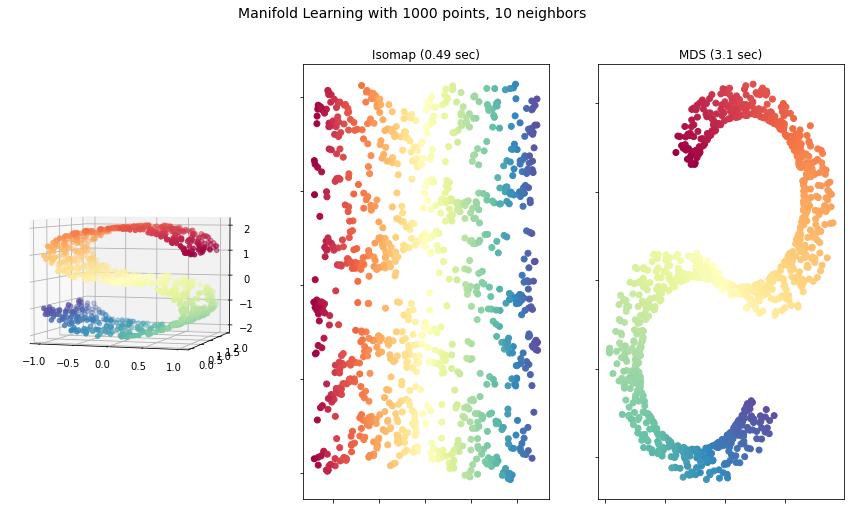

In [4]:
"""
=========================================
 Comparison of Manifold Learning methods
=========================================

An illustration of dimensionality reduction on the S-curve dataset
with various manifold learning methods.

For a discussion and comparison of these algorithms, see the
:ref:`manifold module page <manifold>`

For a similar example, where the methods are applied to a
sphere dataset, see :ref:`example_manifold_plot_manifold_sphere.py`

Note that the purpose of the MDS is to find a low-dimensional
representation of the data (here 2D) in which the distances respect well
the distances in the original high-dimensional space, unlike other
manifold-learning algorithms, it does not seeks an isotropic
representation of the data in the low-dimensional space.
"""

# Author: Jake Vanderplas -- <vanderplas@astro.washington.edu>

print(__doc__)

from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets
%matplotlib inline  

# Next line to silence pyflakes. This import is needed.
Axes3D

n_points = 1000
X, color = datasets.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2

fig = plt.figure(figsize=(15, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)

try:
    # compatibility matplotlib < 1.0
    ax = fig.add_subplot(1,3,1, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
    ax.view_init(4, -72)
except:
    ax = fig.add_subplot(251, projection='3d')
    plt.scatter(X[:, 0], X[:, 2], c=color, cmap=plt.cm.Spectral)



t0 = time()
Y = manifold.Isomap(n_neighbors, n_components).fit_transform(X)
t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(1,3,2)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Isomap (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


t0 = time()
mds = manifold.MDS(n_components, max_iter=100, n_init=1)
Y = mds.fit_transform(X)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(1,3,3)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

plt.show()